In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [95]:
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [96]:
df = df.dropna()

df_majority = df[df['diabetes'] == 0]
df_minority = df[df['diabetes'] == 1]

df_majority_undersampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df_undersampled = pd.concat([df_majority_undersampled, df_minority])
df_undersampled

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
21737,Female,35.0,0,0,No Info,27.32,3.5,200,0
62807,Male,66.0,0,0,No Info,27.32,4.5,145,0
38693,Male,32.0,0,0,never,32.71,6.6,90,0
72875,Male,46.0,0,0,No Info,32.78,4.0,80,0
14817,Female,22.0,0,0,never,23.51,4.5,158,0
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


In [97]:
df_undersampled = df_undersampled.sample(frac=1, random_state=42)
df_undersampled

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
28431,Male,80.0,1,0,former,27.32,8.2,140,1
3627,Female,35.0,0,0,No Info,27.32,4.5,158,0
20708,Female,55.0,1,0,never,27.32,8.8,220,1
23220,Male,68.0,0,0,former,28.19,3.5,100,0
6445,Female,26.0,0,0,not current,21.38,5.8,155,0
...,...,...,...,...,...,...,...,...,...
32003,Female,39.0,0,0,never,39.69,6.1,200,1
40082,Male,68.0,0,0,never,28.56,6.8,220,1
14055,Female,39.0,0,0,never,22.44,4.8,145,0
47327,Male,26.0,0,0,No Info,27.32,6.5,80,0


In [98]:
X = df_undersampled.drop(columns=['diabetes'])
y = df_undersampled['diabetes']

label_encoder = LabelEncoder()
X['gender'] = label_encoder.fit_transform(X['gender'])
X['smoking_history'] = label_encoder.fit_transform(X['smoking_history'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [99]:
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
340/340 [==============================] - 2s 3ms/step - loss: 0.3192 - accuracy: 0.8644 - val_loss: 0.2569 - val_accuracy: 0.8813
Epoch 2/10
340/340 [==============================] - 1s 3ms/step - loss: 0.2517 - accuracy: 0.8856 - val_loss: 0.2411 - val_accuracy: 0.8901
Epoch 3/10
340/340 [==============================] - 1s 3ms/step - loss: 0.2364 - accuracy: 0.8892 - val_loss: 0.2322 - val_accuracy: 0.8908
Epoch 4/10
340/340 [==============================] - 1s 4ms/step - loss: 0.2233 - accuracy: 0.8943 - val_loss: 0.2247 - val_accuracy: 0.8956
Epoch 5/10
340/340 [==============================] - 1s 4ms/step - loss: 0.2169 - accuracy: 0.8974 - val_loss: 0.2184 - val_accuracy: 0.8974
Epoch 6/10
340/340 [==============================] - 1s 2ms/step - loss: 0.2123 - accuracy: 0.8992 - val_loss: 0.2156 - val_accuracy: 0.8982
Epoch 7/10
340/340 [==============================] - 1s 2ms/step - loss: 0.2079 - accuracy: 0.9006 - val_loss: 0.2127 - val_accuracy: 0.8963
Epoch 

In [100]:
predictions_prob = model.predict(X_test.reshape(-1, X_test.shape[1], 1))

# Threshold probabilities to obtain predicted classes (0 or 1)
threshold = 0.5
predictions = (predictions_prob > threshold).astype(int)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(-1, X_test.shape[1], 1), y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

107/107 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.8962
Test Loss: 0.20024792850017548
Test Accuracy: 0.8961764574050903


In [101]:
print('Classification Report:')
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1698
           1       0.88      0.92      0.90      1702

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



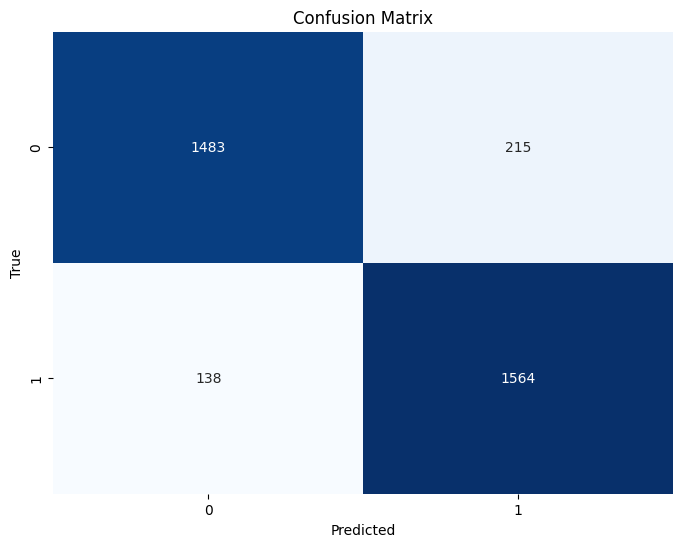

In [102]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

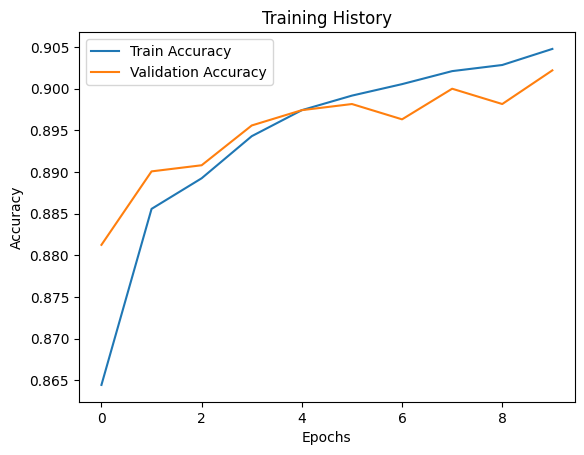

In [103]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

In [104]:
# Manually create a sample with raw values
raw_sample = {
    'gender': 'Male',
    'age': 40,
    'hypertension': 1,
    'heart_disease': 0,
    'smoking_history': 'never',
    'bmi': 30.0,
    'HbA1c_level': 6.0,
    'blood_glucose_level': 120
}

sample_df = pd.DataFrame([raw_sample])

gender_encoder = LabelEncoder()
gender_encoder.classes_ = np.array(['Female', 'Male'])
sample_df['gender'] = gender_encoder.transform(sample_df['gender'])
sample_df['smoking_history'] = label_encoder.transform(sample_df['smoking_history'])

sample_X_scaled = scaler.transform(sample_df)

# Reshape the sample for input into the CNN model
sample_X_reshaped = sample_X_scaled.reshape(1, -1, 1)

predicted_prob = model.predict(sample_X_reshaped)
predicted_class = (predicted_prob > 0.5).astype(int)

print("Predicted Probability:", predicted_prob)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 20ms/step
Predicted Probability: [[0.43706983]]
Predicted Class: [[0]]
